# Ultimate Challenge - Part 1 & 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'logins.json'
data = pd.read_json(path, orient='records', precise_float=True)
data['login_time'] = pd.to_datetime(data['login_time'],unit='s')
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
data.describe()

<ipython-input-3-2bb0b18689d4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# set the index and create a column to aggregate
data = data.set_index('login_time')
data['count'] = 1
df_resampled = data.resample('15 min').sum().sort_values(by='count', ascending=False)

In [6]:
df_resampled

,count
login_time,
1970-03-01 04:30:00,73
1970-04-04 05:30:00,66
1970-04-04 01:30:00,64
1970-04-04 01:15:00,63
1970-04-01 23:30:00,60
...,...
1970-01-11 09:45:00,0
1970-02-16 08:15:00,0
1970-01-27 08:30:00,0


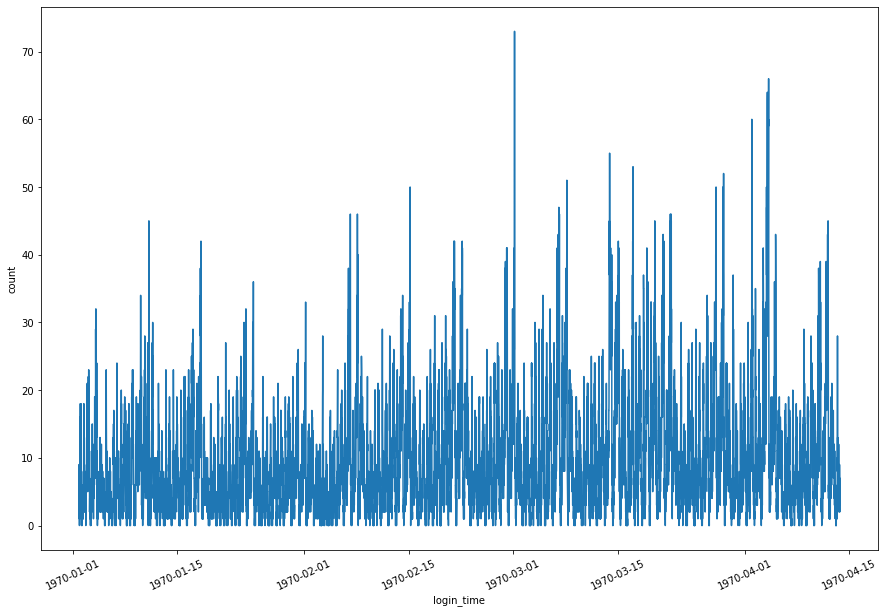

In [7]:
def create_plot(df, x_col, y_col, tf='15min', thresh=0):
    f = plt.figure(figsize=(12,12))
    f.set_figwidth(15)
    f.set_figheight(10)

    df_resampled = df.resample(str(tf)).sum().sort_values(by='count', ascending=False)

    sns.lineplot(x = x_col, y = y_col,
                data = df_resampled.loc[df_resampled['count'] >= thresh])
    
    plt.xticks(rotation = 25)
    plt.show();    

# create the time series plot
create_plot(data, 'login_time', 'count')

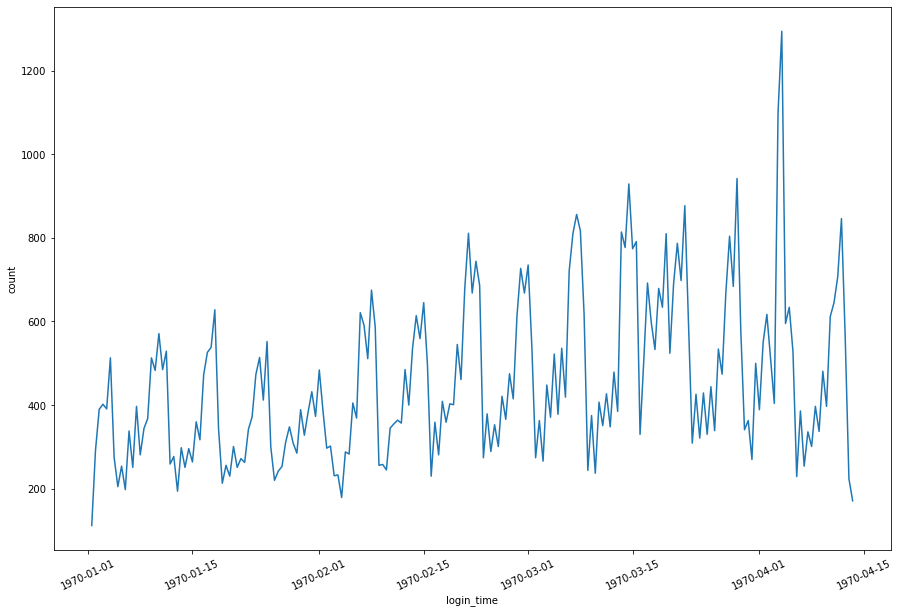

In [8]:
# filter out some of the noise with a higher time frame
create_plot(data, 'login_time', 'count', '12H')

In [9]:
# obvious seasonality, so let's go back up in frequency and do the data set in 4ths
first_qtr = int(len(data) / 4)
second_qtr = int(len(data) / 4) * 2
third_qtr = int(len(data) / 4) * 3
first_qtr, second_qtr, third_qtr

(23285, 46570, 69855)

In [10]:
window = '15min'

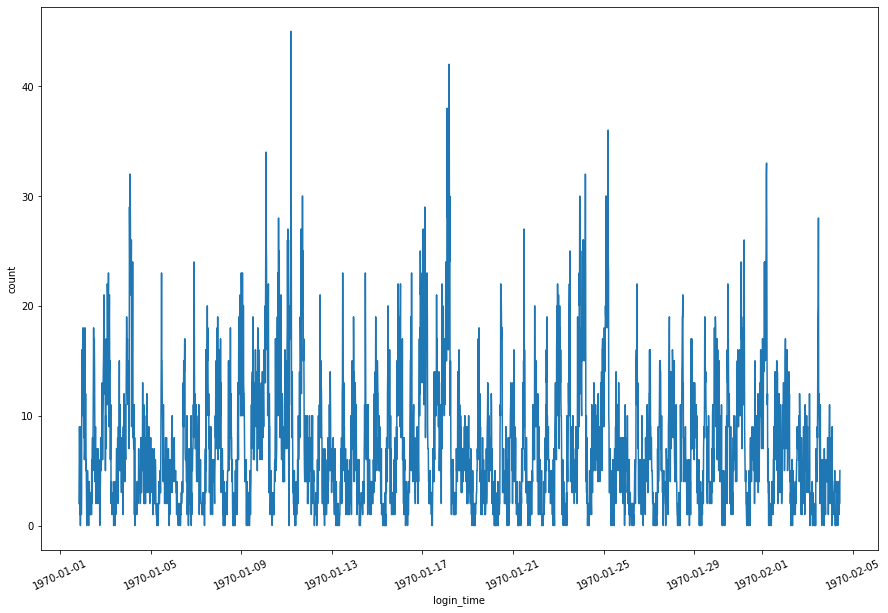

In [11]:
create_plot(data[:first_qtr], 'login_time', 'count', window)

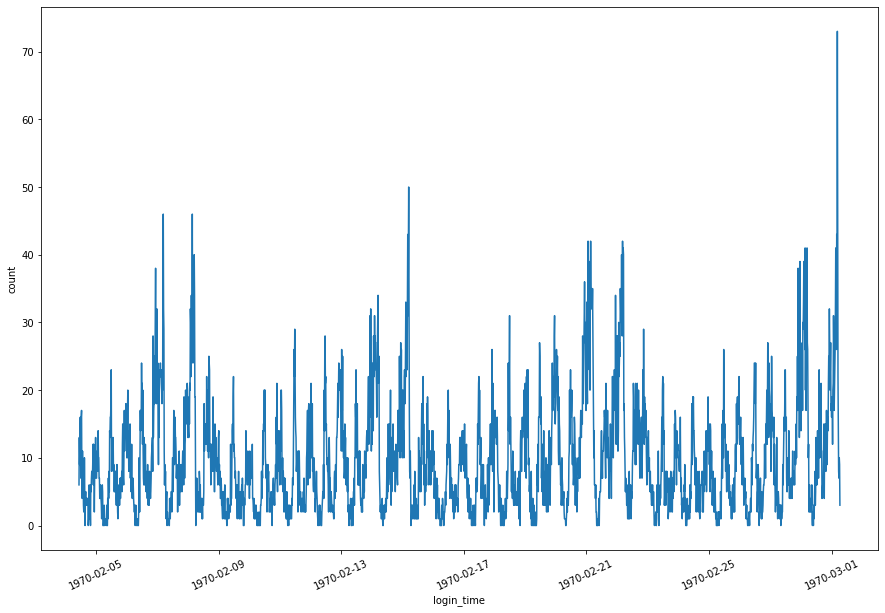

In [12]:
create_plot(data[first_qtr:second_qtr], 'login_time', 'count', window)

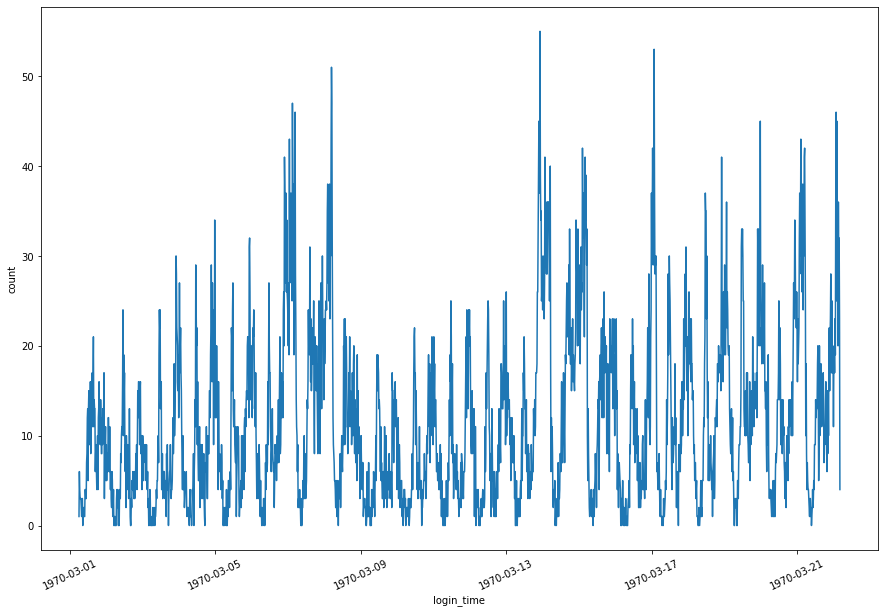

In [13]:
create_plot(data[second_qtr:third_qtr], 'login_time', 'count', window)

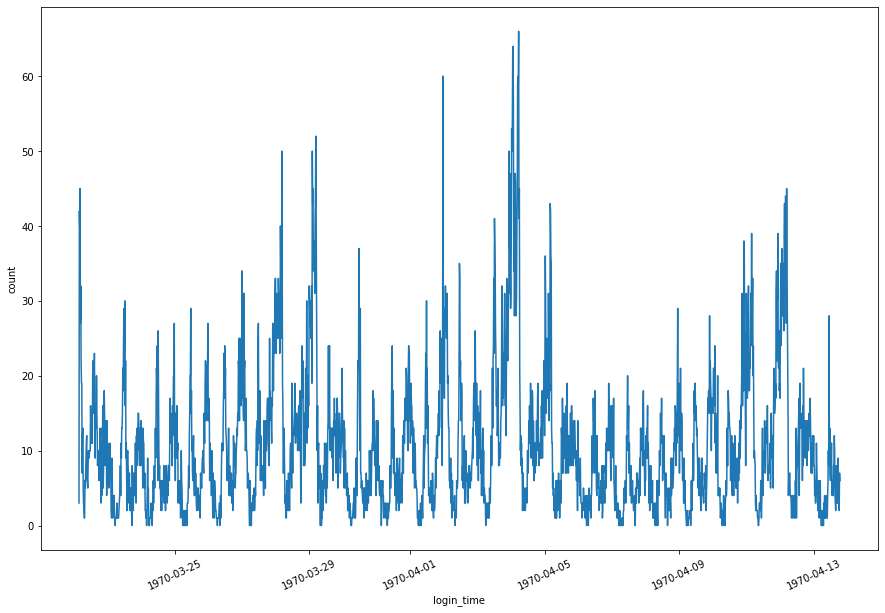

In [14]:
create_plot(data[third_qtr:], 'login_time', 'count', window)

In [22]:
# Loading the library
from prophet import Prophet

# Prophet requires a df with 2 columns: 'ds' & 'y'
df = df_resampled.copy()
df = df.rename(columns={"count":"y"})
df['ds'] = df.index
df


,y,ds
login_time,,
1970-03-01 04:30:00,73,1970-03-01 04:30:00
1970-04-04 05:30:00,66,1970-04-04 05:30:00
1970-04-04 01:30:00,64,1970-04-04 01:30:00
1970-04-04 01:15:00,63,1970-04-04 01:15:00
1970-04-01 23:30:00,60,1970-04-01 23:30:00
...,...,...
1970-01-11 09:45:00,0,1970-01-11 09:45:00
1970-02-16 08:15:00,0,1970-02-16 08:15:00
1970-01-27 08:30:00,0,1970-01-27 08:30:00


In [23]:
# Fitting the model
model = Prophet() 
model.fit(df) #fit the  model.



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [24]:
# Predict
future = model.make_future_dataframe(periods=730) # predicting for ~ 2 years
forecast = model.predict(future) # Predict future



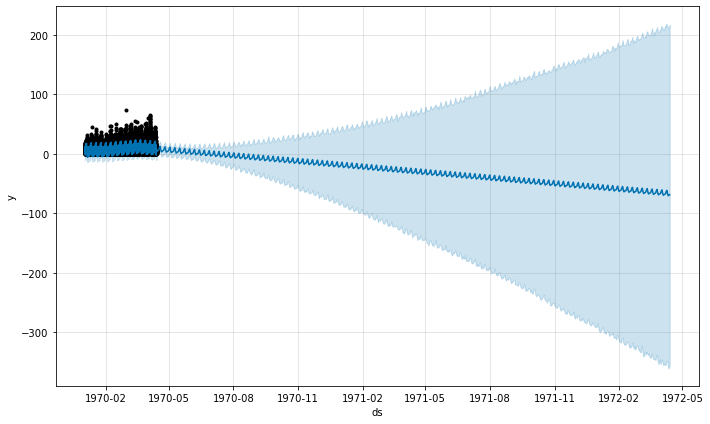

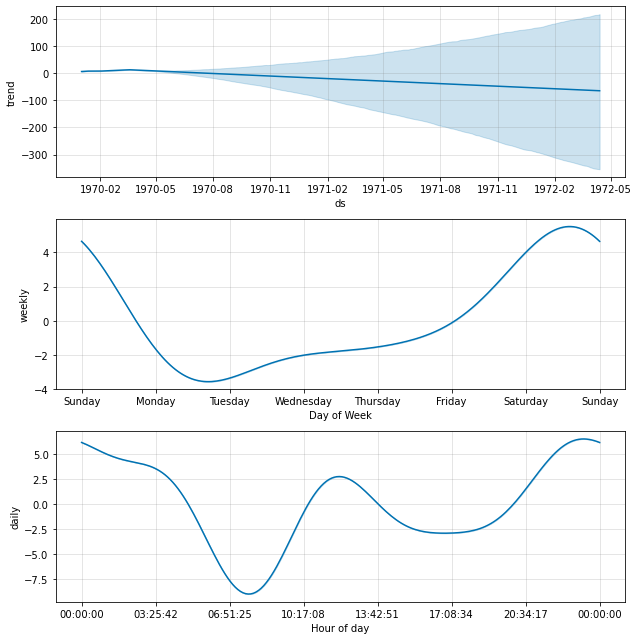

In [25]:
# Plot results
fig1 = model.plot(forecast) # Plot the fit to past data and future forcast.
fig2 = model.plot_components(forecast) # Plot breakdown of components.
plt.show()


In [26]:
forecast # Displaying various results in table format.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 20:00:00,5.986035,-2.753937,13.237263,5.986035,5.986035,-0.520966,-0.520966,-0.520966,-0.004230,-0.004230,-0.004230,-0.516736,-0.516736,-0.516736,0.0,0.0,0.0,5.465069
1,1970-01-01 20:15:00,5.987849,-2.396966,13.837507,5.987849,5.987849,0.132978,0.132978,0.132978,0.627591,0.627591,0.627591,-0.494613,-0.494613,-0.494613,0.0,0.0,0.0,6.120827
2,1970-01-01 20:30:00,5.989663,-1.802898,14.993679,5.989663,5.989663,0.832438,0.832438,0.832438,1.304587,1.304587,1.304587,-0.472149,-0.472149,-0.472149,0.0,0.0,0.0,6.822101
3,1970-01-01 20:45:00,5.991477,-0.194533,15.412283,5.991477,5.991477,1.560916,1.560916,1.560916,2.010256,2.010256,2.010256,-0.449340,-0.449340,-0.449340,0.0,0.0,0.0,7.552393
4,1970-01-01 21:00:00,5.993291,0.162382,16.559901,5.993291,5.993291,2.299255,2.299255,2.299255,2.725437,2.725437,2.725437,-0.426182,-0.426182,-0.426182,0.0,0.0,0.0,8.292546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10513,1972-04-08 18:45:00,-64.442714,-347.867714,215.805634,-352.521158,214.359965,3.158871,3.158871,3.158871,-2.170459,-2.170459,-2.170459,5.329330,5.329330,5.329330,0.0,0.0,0.0,-61.283843
10514,1972-04-09 18:45:00,-64.545038,-351.488497,213.994296,-352.841012,214.649881,-2.477274,-2.477274,-2.477274,-2.170459,-2.170459,-2.170459,-0.306815,-0.306815,-0.306815,0.0,0.0,0.0,-67.022312
10515,1972-04-10 18:45:00,-64.647362,-360.778615,211.783886,-353.160866,215.162081,-5.708243,-5.708243,-5.708243,-2.170459,-2.170459,-2.170459,-3.537784,-3.537784,-3.537784,0.0,0.0,0.0,-70.355605
10516,1972-04-11 18:45:00,-64.749687,-358.673880,211.309340,-353.480720,216.123530,-4.366540,-4.366540,-4.366540,-2.170459,-2.170459,-2.170459,-2.196081,-2.196081,-2.196081,0.0,0.0,0.0,-69.116227
